In [2]:
#Question_1:
#Download the following customer dataset from below link:
#Data Set: https://www.kaggle.com/shwetabh123/mall-customers
#This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall.
#The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as
#a mall owner you need to find the group of people who are the profitable customers for the mall
#owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of
#customers.
#a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if
#necessary.
#b. Perform data-preparation( Train-Test Split)
#c. Apply Machine Learning Algorithm
#d. Evaluate Model.
#e. Apply Cross-Validation and Evaluate Model

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.describe()
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [14]:
scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,-1.738999,-0.434801
1,2,1,21,-1.738999,1.195704
2,3,0,20,-1.700830,-1.715913
3,4,0,23,-1.700830,1.040418
4,5,0,31,-1.662660,-0.395980


In [17]:
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)  
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [18]:
df['kmeans_cluster'] = kmeans.labels_

In [19]:
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')  
hc.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

AgglomerativeClustering(n_clusters=3)

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
0,1,1,19,-1.738999,-0.434801,2
1,2,1,21,-1.738999,1.195704,2
2,3,0,20,-1.700830,-1.715913,2
3,4,0,23,-1.700830,1.040418,2
4,5,0,31,-1.662660,-0.395980,2


In [21]:
df['hc_cluster'] = hc.labels_

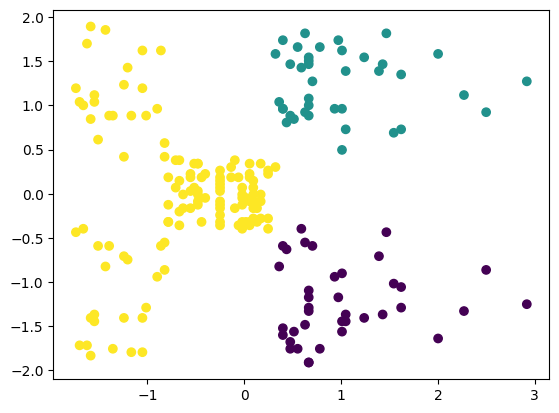

In [22]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['kmeans_cluster'])
plt.show()

In [23]:
silhouette_kmeans = silhouette_score(df, kmeans.labels_)
silhouette_hc = silhouette_score(df, hc.labels_)

ch_score_kmeans = calinski_harabasz_score(df, kmeans.labels_)
ch_score_hc = calinski_harabasz_score(df, hc.labels_)


In [26]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster,hc_cluster
0,1,1,19,-1.738999,-0.434801,2,0
1,2,1,21,-1.738999,1.195704,2,0
2,3,0,20,-1.700830,-1.715913,2,0
3,4,0,23,-1.700830,1.040418,2,0
4,5,0,31,-1.662660,-0.395980,2,0
5,6,0,22,-1.662660,1.001596,2,0
6,7,0,35,-1.624491,-1.715913,2,0
7,8,0,23,-1.624491,1.700384,2,0
8,9,1,64,-1.586321,-1.832378,2,0
9,10,0,30,-1.586321,0.846310,2,0
